In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class Plane:
    def __init__(self,_id,_current_pos,_current_vel,_pos_array,_vel_array):
        self.id = _id #Unique id of plane
        #Think remove the initial pos
        self.pos_current = _current_pos #Pos at current time
        self.vel_current = _current_vel #Vel at current time
        self.pos_array = _pos_array #Array of position over time
        self.vel_array = _vel_array #Array of velocity over time

    def __str__(self):
        #For useful output whenprinting object e.g. print(plane) = ID: 10, Pos: [0,1,2] etc.
        #Probably needs bit of adjusting
        return "ID: {id}, Current_pos: {c_pos}, Current_vel: {c_vel}".format(id = self.id, c_pos = self.pos_current, c_vel = self.vel_current)

In [39]:
def create_n_planes(n_planes,max_pos,max_vel,num_time_steps):
    # n_planes controls how many planes are created
    # max_pos is used as size of the grid planes put randomly in (just temp)
    # max_vel scales the maximum velocity of the planes

    plane_list = []
    for id in range(n_planes):
        # initial_pos = np.random.rand(3) * max_pos
        # initial_vel = np.random.rand(3) * max_vel

        pos_array = np.zeros((num_time_steps,3))
        vel_array = np.zeros((num_time_steps,3))

        pos_array[0,:] = np.random.rand(3) * max_pos
        vel_array[0,:] = np.random.rand(3) * max_vel

        plane_list.append(Plane(id, #Unique id
                                pos_array[0,:], #Inital pos
                                vel_array[0,:], #Initial vel
                                pos_array, #Pos array
                                vel_array)) #Vel array
    
    return plane_list

In [40]:
#Define variables about planes
num_planes = 10
grid_size = 10 #10x10 grid
max_plane_vel = 1

#Define time setup
max_t = 10
delta_t = 0.5
num_t_steps = int(max_t / delta_t)

In [41]:
#Create planes
planes = create_n_planes(num_planes,grid_size,max_plane_vel,num_t_steps)

In [42]:
def risk_function(plane_pos,plane_vel,coord):
    risk = 1/( (coord[0] - plane_pos[0])**2 + (coord[1] - plane_pos[1])**2+ 1)
    return risk

In [43]:
def create_risk_field(plane_pos,plane_vel,grid_size):
    out = np.zeros((grid_size,grid_size))
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            #Need to get actual coords rather than indice?
            coord = [i,j]
            out[i,j] = risk_function(plane_pos,plane_vel,coord)
    return out

In [44]:
fields = [ create_risk_field(plane.pos_current,plane.vel_current,grid_size) for plane in planes]

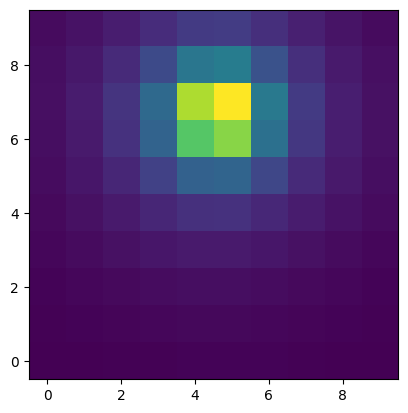

In [45]:
plt.imshow(fields[0],origin='lower')

In [46]:
combinations = []
for i in range(num_planes):
    for j in range(i+1,num_planes):
        combinations.append([i,j])

field_combination_multiplied = [ fields[combination[0]] * fields[combination[1]] for combination in combinations]
combination_sums = [np.sum(field) for field in field_combination_multiplied]

30.928800843134038

In [48]:
total_risk = np.sum(combination_sums)
mean_pair_risk = np.mean(combination_sums)

print("Num pairs: ", len(combinations))
print("Mean total pair risk: ", mean_pair_risk)
print("Total risk: ", total_risk)

Num pairs:  45
Mean total pair risk:  0.6873066854029786
Total risk:  30.928800843134038
